<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [10]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [11]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(r"C:\Users\micha\Documents\GitHub\ds-mel-pt-24feb-projects\MichaelPresidente\Data\housing.data", header=None, names=names, delim_whitespace=True)

In [12]:
# Head
data.head(2)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [13]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235CD777AC8>]],
      dtype=object)

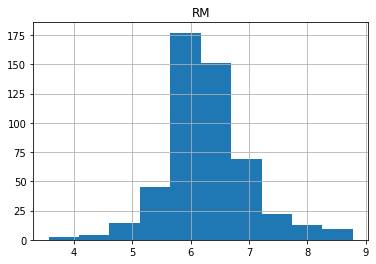

In [14]:
#  ANSWER
data.hist("RM")

##### 2. Plot Histogram of `MEDV`

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235CDCC7D48>]],
      dtype=object)

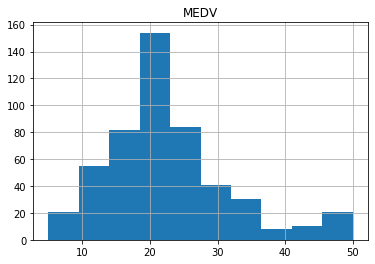

In [15]:
# ANSWER
data.hist("MEDV")

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

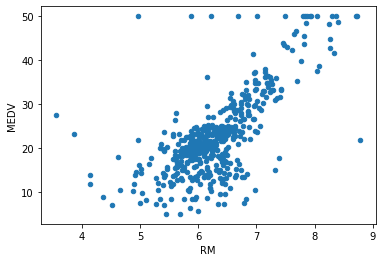

In [16]:
# ANSWER
data.plot.scatter(x="RM",y="MEDV")

##### 3.B Is there any trend? State your observation.
##### MEDV rises when RM increases. However, this trend appears strong only when RM is less than 5 and greater than 8. This can be illustrated with the addition of a regression line to the scatter plot.

**ANSWER:**: ...

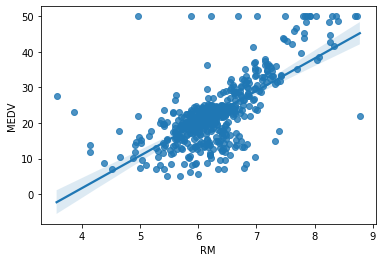

In [17]:
sns.regplot(x="RM",y="MEDV", data=data)

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is a difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [18]:
# ANSWER:
## Looking for a 95% confidence measure that the selected values would appear in a random sample of a normalised population. Therefore the resultdid not occur by chance alone, and can be repeated.

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataset.

In [19]:
# ANSWER
# Create a large house dataframe
large_house = data.loc[data["RM"]>6]

# Create a small house dataframe
small_house= data.loc[data["RM"]<6]

# Select 100 rows from large_house
lhs = large_house.sample(n=100)

# Select 100 rows from small_house
shs = small_house.sample(n=100)


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

In [20]:
# ANSWER


##### 7. Calculate Variance

Calculate variance for both samples.

In [21]:
# ANSWER
# Variance for large_house - for Rooms and Medium Value

# Variance for Rooms
print(lhs["RM"].var())

# Variance for Medium Value
print(lhs["MEDV"].var())

0.36709768525252523
104.5412878787879


In [22]:
# ANSWER
# Variance for small_house - for Rooms and Medium Value

# Variance for Rooms
print(shs["RM"].var())

# Variance for Medium Value
print(shs["MEDV"].var())

0.13160845454545447
35.53512222222221


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

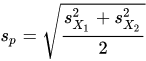

![](://wikimedia.org/aphttpsi/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [32]:
# ANSWER
std_Lhs = stats.stdev(lhs)

AttributeError: module 'scipy.stats' has no attribute 'stdev'

##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [24]:
# ANSWER

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [25]:
# ANSWER

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [26]:
# ANSWER

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [27]:
# ANSWER

In [28]:
# ANSWER

In [29]:
# ANSWER

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [30]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [31]:
# ANSWER



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



